# Flickbike casus opdracht 1

## Onderzoeksvragen
1. **Hoe voorspel je het aantal verhuurde fietsen op de dagen tussen 10 december 2019 en 31 januari 2020?**
    1. Onderzoek doen naar factoren die invloed hebben op het aantal verhuurde fietsen.
    2. Kijk wat de bestaande data te bieden heeft.
    3. Kijk wat voor aanvullende data je nodig moet hebben om meer factoren in kaart te brengen.
    4. Laad de data in in een Jupyter notebook.
    5. Identificeer de kolommen.
    6. Identificeer de types + range van elke kolom.
    7. Identificeer hoeveel unieke waarde elke kolom heeft.
    8. Kijk of er sprake is van trends in het aantal verhuurde fiets. ( kan soms met blote oog, of statistisch)
    9. Als er sprake is van een sterkte trend, gebruik een model wat hier goed bij past. (bv. SARIMA)
    10. Als er geen sprake is van een tijdsgebonden trend, zoek correlaties met andere kolommen.
    11. Als er sprake is van correlaties in bepaalde kolommen, gebruik een regressie model. 
    12. Als er geen relatie is, probeer nieuwe factoren. (Stap 3)


2. **Welke invloeden verwacht je van dat ze relevant zijn?**
     - Weer: Er gaan minder mensen fietsen als het regent.
     - De dagen van de week: Doordeweeks werken er meer mensen dan in het weekend en vertonen ze ander gedrag.
     - Feestdagen: Feestdagen zijn vaak vrije dagen en dus werken er geen mensen en vertonen ze ander gedrag.
     - Economische crisis: bij een economische crisis is de werkloosheid lager, en dus mogelijk minder gehuurde fietsen.
     - Een mogelijke pandemie: Als er een lockdown is gaan mensen niet naar buiten.


3. **Op welke manier kun je je model gevoelig maken voor bepaalde factoren?**

Door middel van libraries als keras is het mogelijk om de gewichten automatisch te laten bepalen, hierdoor hoef je dat dus zelf niet te doen.


4. **Hoe kan, op basis van data, worden voorspeld waar er tekorten van fietsen dreigen te ontstaan en hoe de fietsen het beste zo kunnen worden verplaatst dat ze zowel over het hele terrein van Schiphol-Oost beschikbaar zijn en tegelijkertijd vooral beschikbaar zijn op plaatsen waar het regelmatig druk is?**

Hier zou het mogelijk zijn om een simulatie uit te voeren. Een andere optie is om een statistisch model op lokaal uit te voeren.
    
5. **Hoe kun je berekenen met hoeveel fietsen FlickBike minimaal zou kunnen werken, zodanig dat te verwachten pieken op te vangen zijn?**

Het antwoord op deze vraag is afhankelijk van de uitwerking van de vorige vraag. Als de fietsen goed verdeeld worden, en dus naar plekken waar pieken plaatsvinden meer fietsen verplaatst worden, dan zijn er minder fietsen nodig dan dat je hier domweg overal de zelfde fietsen neerzet. Er is dus niet direct een concreet antwoord op deze vraag.


## Visualisaties

**Vraag 1:** Een plot met op de X-as de tijd in dagen/weken, afhankelijk van de historische data, op de Y-as het aantal verhuurde fietsen. Een deel van de lijn zal een andere kleur hebben en dit zal de voorspelling zijn.

**Vraag 2:** Een correltiematrix.

**Vraag 3:** N.v.t.

**Vraag 4:** Een simpele visualisatie van de simulatie of een heatmap.

**Vraag 5:** Idem. Deze gaat hand in hand met vraag 4.

### Data exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_df = pd.read_csv('./data/test.csv')
train_df = pd.read_csv('./data/train.csv')

In [3]:
# Check if there are any zeroes
pd.concat([train_df, test_df]).isnull().any()

Unnamed: 0    False
tripid        False
userid        False
bikeid        False
account       False
bikenumber    False
start_time    False
end_time      False
start_lat     False
start_lng     False
end_lat       False
end_lng       False
date          False
dtype: bool

In [4]:
# Convert date to datetime
test_df.date = pd.to_datetime(test_df.date)
train_df.date = pd.to_datetime(train_df.date)

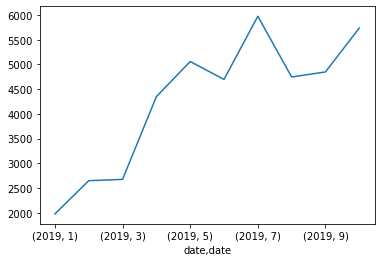

In [5]:
# Show overview of rented bikes
train_df.date.groupby([train_df.date.dt.year, train_df.date.dt.month]).agg('count').plot()
plt.show()

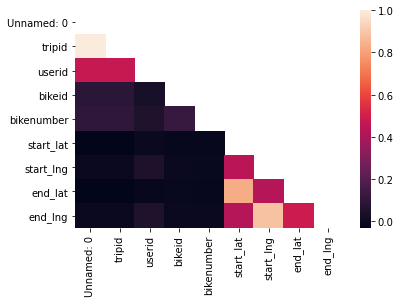

In [6]:
# Plot correlation
corr = train_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask)
plt.show()

### Data enrichment

In [7]:
# Import National holidays
national_holidays = pd.read_csv("./data/Nationale Feestdagen.csv")
other_holidays = pd.read_csv("./data/Overige Feestdagen.csv")
holidays = pd.concat([national_holidays, other_holidays], ignore_index=True)

In [8]:
# Show data
holidays.head()

,Feestdag,Datum
0,Nieuwjaarsdag 2019,01 Jan 2019
1,Bevrijdingsdag 2019,05 May 2019
2,Hemelvaart 2019,30 May 2019
3,Goede vrijdag 2019,19 Apr 2019
4,1e Paasdag 2019,21 Apr 2019


In [9]:
# Set to datetime
holidays.Datum = pd.to_datetime(holidays.Datum)

In [10]:
# Save as string date-month
holidays.Datum = holidays.Datum.dt.strftime('%d-%m')
holidays.Datum

0     01-01
1     05-05
2     30-05
3     19-04
4     21-04
5     22-04
6     27-04
7     09-06
8     10-06
9     25-12
10    26-12
11    04-05
12    04-10
13    06-01
14    12-05
15    31-10
16    14-02
17    16-06
18    17-09
19    11-11
20    29-11
21    05-12
22    31-12
Name: Datum, dtype: object

In [11]:
# Add column "special_day" to bike data
train_df['month_year'] = train_df.date.dt.strftime('%d-%m')
train_df['special_day'] = train_df['month_year'].isin(holidays.Datum)
del train_df['month_year']

In [12]:
# See how many rentals where on a special day
train_df['special_day'].value_counts()

False    41511
True      1209
Name: special_day, dtype: int64

In [13]:
# See how many rentals are divided over different days
train_df.date.dt.weekday.value_counts()

1    9152
3    9088
2    8321
0    7790
4    6488
5     998
6     883
Name: date, dtype: int64

In [14]:
# Add weekday to dataframe
train_df['weekday'] = train_df.date.dt.weekday

In [15]:
# Add boolean is_workday (ma-fr)
train_df['is_workday'] = train_df.date.dt.weekday.between(0,4)

### Weather data

In [16]:
KNMI_2019 = pd.read_csv("./data/KNMI_weerdata.csv")
locatie_STN = pd.read_csv("./data/locatie_meetstations.csv")

In [17]:
KNMI_2019

,STN,YYYYMMDD,FHX,FHN,FXX,TN,TX,SQ,SP,DR,RH,RHX,VVN,VVX
0,209,20190101,140.0,70.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,209,20190102,130.0,40.0,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,209,20190103,80.0,50.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,209,20190104,100.0,50.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,209,20190105,110.0,80.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,391,20191228,30.0,10.0,60.0,-22.0,26.0,35.0,45.0,0.0,0.0,0.0,NaN,NaN
17198,391,20191229,30.0,10.0,50.0,-10.0,29.0,9.0,11.0,0.0,0.0,0.0,NaN,NaN
17199,391,20191230,30.0,10.0,60.0,-6.0,80.0,57.0,72.0,0.0,0.0,0.0,NaN,NaN
17200,391,20191231,30.0,0.0,40.0,-18.0,44.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [18]:
# Some weatherstations do not have all columns, those should not be used.
incomplete = KNMI_2019[KNMI_2019.isnull().any(axis=1)].STN.unique()

# Remove from weather data
KNMI_2019 = KNMI_2019[~KNMI_2019.STN.isin(incomplete)]

# Remove from locations
locatie_STN = locatie_STN[~locatie_STN.STN.isin(incomplete)]

In [19]:
# Some locations are not in the dataset, those should be removed from locations aswell
locatie_STN = locatie_STN[locatie_STN.STN.isin(KNMI_2019.STN.unique())]

In [20]:
# Set YYYYMMDD to datetime
KNMI_2019['date'] = pd.to_datetime(KNMI_2019.YYYYMMDD, format='%Y%m%d' ).dt.date
del KNMI_2019['YYYYMMDD']
KNMI_2019['date']

c:\users\berry\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1464     2019-01-01
1465     2019-01-02
1466     2019-01-03
1467     2019-01-04
1468     2019-01-05
            ...    
16831    2019-12-28
16832    2019-12-29
16833    2019-12-30
16834    2019-12-31
16835    2020-01-01
Name: date, Length: 5856, dtype: object

In [21]:
# For each record, get the closest weather station.
from scipy.spatial.distance import cdist

def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

def match_value(df, col1, x, col2):
    """ Match value x from col1 row to value in col2. """
    return df[df[col1] == x][col2].values[0]

locatie_STN['point'] = [(x, y) for x,y in zip(locatie_STN['LAT'], locatie_STN['LON'])]
train_df['point'] = [(x, y) for x,y in zip(train_df['start_lat'], train_df['start_lng'])]

train_df['closest_coord'] = [closest_point(x, list(locatie_STN['point'])) for x in train_df['point']]
train_df['closest_weather_station'] = [match_value(locatie_STN, 'point', x, 'STN') for x in train_df['closest_coord']]

In [22]:
# Add day of year to bike data
train_df['day_of_year'] = pd.to_datetime(train_df['date']).dt.date
train_df

,Unnamed: 0,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,end_lng,date,special_day,weekday,is_workday,point,closest_coord,closest_weather_station,day_of_year
0,1,33838,13452,382,AT,6631000433,2019-01-01 06:46:03,2019-01-01 06:46:03,52.296065,4.787667,52.296200,4.787679,2019-01-01 06:46:00,True,1,True,"(52.296065000000006, 4.787667400000001)","(52.318000000000005, 4.79)",240,2019-01-01
1,2,33839,13452,812,AT,6631000146,2019-01-01 06:47:39,2019-01-01 06:47:39,52.295938,4.788336,52.295940,4.788557,2019-01-01 06:47:35,True,1,True,"(52.2959377, 4.788336)","(52.318000000000005, 4.79)",240,2019-01-01
2,3,33851,13182,238,AT,6631000443,2019-01-01 14:15:36,2019-01-01 14:15:36,52.307337,4.807633,52.307336,4.807630,2019-01-01 14:15:32,True,1,True,"(52.307337100000005, 4.807632599999999)","(52.318000000000005, 4.79)",240,2019-01-01
3,4,33852,13182,238,AT,6631000443,2019-01-01 14:33:50,2019-01-01 14:33:50,52.308478,4.809970,52.308537,4.810099,2019-01-01 14:33:46,True,1,True,"(52.3084781, 4.8099702)","(52.318000000000005, 4.79)",240,2019-01-01
4,5,33867,12674,787,AI,6631000283,2019-01-01 20:11:05,2019-01-01 20:11:05,52.510340,4.725336,52.508565,4.726276,2019-01-01 20:11:01,True,1,True,"(52.510339563206394, 4.725335992667411)","(52.318000000000005, 4.79)",240,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42715,42716,151886,24766,42,AV,6631000766,2019-10-31 18:09:17,2019-10-31 18:11:54,52.300051,4.794250,52.300051,4.794204,2019-10-31 18:09:13,True,3,True,"(52.300050799999994, 4.7942499000000005)","(52.318000000000005, 4.79)",240,2019-10-31
42716,42717,151888,15868,491,AT,6631000685,2019-10-31 18:13:11,2019-10-31 18:21:46,52.295279,4.791217,52.295279,4.791217,2019-10-31 18:13:07,True,3,True,"(52.295279, 4.791217)","(52.318000000000005, 4.79)",240,2019-10-31
42717,42718,151891,21935,1752,AT,6631002278,2019-10-31 18:35:34,2019-10-31 18:40:19,52.307616,4.807526,52.307416,4.807607,2019-10-31 18:35:30,True,3,True,"(52.30761629999999, 4.8075263)","(52.318000000000005, 4.79)",240,2019-10-31
42718,42719,151896,14605,1752,AT,6631002278,2019-10-31 20:57:03,2019-10-31 21:00:50,52.306519,4.809982,52.308695,4.761974,2019-10-31 20:56:58,True,3,True,"(52.306519, 4.809982)","(52.318000000000005, 4.79)",240,2019-10-31


In [23]:
# Merge on date and STN
train_df = pd.merge(train_df, KNMI_2019,  how='left', left_on=['day_of_year','closest_weather_station'], right_on = ['date','STN'])

In [24]:
train_df.sample(10)

,Unnamed: 0,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,...,TN,TX,SQ,SP,DR,RH,RHX,VVN,VVX,date_y
14380,14381,77454,15544,226,AV,6631000741,2019-05-17 13:34:08,2019-05-17 13:36:20,52.296707,4.788220,...,95.0,151.0,13.0,8.0,0.0,-1.0,-1.0,60.0,82.0,2019-05-17
4439,4440,48805,14971,763,AT,6631000334,2019-02-27 18:09:34,2019-02-27 18:17:59,52.296405,4.788517,...,34.0,176.0,97.0,91.0,0.0,0.0,0.0,50.0,72.0,2019-02-27
8033,8034,60155,15985,89,AT,6631000736,2019-04-05 08:16:07,2019-04-05 08:18:01,52.264734,4.764627,...,16.0,120.0,108.0,82.0,0.0,0.0,0.0,60.0,82.0,2019-04-05
15373,15374,80031,18570,202,AT,6631000794,2019-05-23 08:40:36,2019-05-23 08:55:24,52.304418,4.808219,...,79.0,204.0,145.0,90.0,0.0,0.0,0.0,67.0,82.0,2019-05-23
14712,14713,78339,13218,822,BJ,6631000175,2019-05-20 15:31:10,2019-05-20 15:31:28,52.307385,4.800349,...,112.0,148.0,0.0,0.0,0.0,0.0,0.0,22.0,61.0,2019-05-20
18032,18033,87149,12774,1271,AT,6631000359,2019-06-11 08:34:52,2019-06-11 08:38:29,52.307193,4.808317,...,114.0,185.0,94.0,56.0,6.0,4.0,4.0,60.0,83.0,2019-06-11
39566,39567,145057,23300,256,AT,6631000371,2019-10-16 14:31:16,2019-10-16 14:33:46,52.307457,4.807570,...,104.0,146.0,26.0,24.0,90.0,72.0,19.0,37.0,70.0,2019-10-16
40207,40208,146418,17554,154,AT,6631000933,2019-10-20 12:39:52,2019-10-20 12:40:24,52.279388,4.859704,...,76.0,144.0,9.0,9.0,0.0,-1.0,-1.0,50.0,70.0,2019-10-20
19495,19496,91283,15325,256,AT,6631000371,2019-06-20 07:58:57,2019-06-20 08:08:14,52.321279,4.792807,...,128.0,200.0,68.0,41.0,5.0,1.0,1.0,42.0,81.0,2019-06-20
1747,1748,40082,14260,282,AT,6631000067,2019-01-29 17:51:14,2019-01-29 17:54:35,52.301724,4.796834,...,-15.0,42.0,73.0,82.0,0.0,-1.0,-1.0,65.0,80.0,2019-01-29


In [25]:
train_df.dtypes

Unnamed: 0                          int64
tripid                              int64
userid                              int64
bikeid                              int64
account                            object
bikenumber                          int64
start_time                         object
end_time                           object
start_lat                         float64
start_lng                         float64
end_lat                           float64
end_lng                           float64
date_x                     datetime64[ns]
special_day                          bool
weekday                             int64
is_workday                           bool
point                              object
closest_coord                      object
closest_weather_station             int64
day_of_year                        object
STN                                 int64
FHX                               float64
FHN                               float64
FXX                               

In [26]:
# remove temporary columns
train_df.drop(columns=['date_y', 'STN', 'Unnamed: 0'], inplace=True)

# Rename to descriptive column name
train_df.rename({
    'date_x':'date',
    'FHX':   'highest_wind_speed',
    'FHN':   'lowest_wind_speed',
    'FXX':   'highest_wind_gust',
    'TN':    'min_temp',
    'TX':    'max_temp',
    'SQ':    'sunshine_duration',
    'SP':    'percentage_of_max_possible_sunshine_duration',
    'DR':    'rainfall_duration',
    'RH':    'sum_of_rainfall',
    'RHX':   'highest_hoursum_of_rainfall',
    'VVN':   'min_sight',
    'VVX':   'max_sight',
}, inplace=True)

In [28]:
train_df.sample(10)

,tripid,userid,bikeid,account,bikenumber,start_time,end_time,start_lat,start_lng,end_lat,...,FXX,TN,TX,SQ,SP,DR,RH,RHX,VVN,VVX
26969,110849,17193,1055,AT,6631000467,2019-07-30 08:13:31,2019-07-30 08:32:38,52.297173,4.850960,52.293183,...,120.0,153.0,283.0,139.0,89.0,0.0,0.0,0.0,70.0,83.0
31492,123123,19471,933,AV,6631000513,2019-08-28 15:18:48,2019-08-28 15:30:52,52.304304,4.800080,52.304117,...,120.0,183.0,254.0,34.0,24.0,0.0,-1.0,-1.0,27.0,74.0
34941,133114,18000,318,BJ,6631000009,2019-09-17 17:52:30,2019-09-17 17:55:40,52.307378,4.807572,52.305855,...,140.0,91.0,182.0,45.0,36.0,0.0,-1.0,-1.0,70.0,81.0
8501,61365,17092,767,BJ,6631000828,2019-04-09 10:56:25,2019-04-09 10:59:20,52.307843,4.800552,52.307707,...,140.0,61.0,137.0,116.0,86.0,0.0,0.0,0.0,60.0,81.0
30025,119290,18485,357,AB,6631000431,2019-08-20 18:52:16,2019-08-20 18:56:49,52.294787,4.785028,52.288803,...,120.0,116.0,208.0,114.0,79.0,0.0,-1.0,-1.0,61.0,81.0
8272,60781,17021,751,AT,6631000316,2019-04-08 10:15:53,2019-04-08 10:25:12,52.308849,4.802402,52.308840,...,110.0,80.0,198.0,109.0,81.0,0.0,0.0,0.0,59.0,77.0
34106,130493,15233,1019,BJ,6631000462,2019-09-12 12:03:14,2019-09-12 12:05:31,52.307585,4.800360,52.307612,...,120.0,129.0,219.0,99.0,77.0,0.0,0.0,0.0,60.0,80.0
36751,138448,22224,620,AT,6631000976,2019-09-29 07:17:37,2019-09-29 07:24:14,52.307079,4.807854,52.307079,...,180.0,130.0,177.0,5.0,4.0,108.0,181.0,37.0,50.0,70.0
32940,127178,12706,314,AT,6631000040,2019-09-05 12:03:23,2019-09-05 12:09:34,52.306241,4.800346,52.306485,...,150.0,84.0,178.0,79.0,59.0,6.0,11.0,5.0,64.0,81.0
33500,128821,16884,519,BC,6631000696,2019-09-09 16:06:52,2019-09-09 16:09:32,52.314310,4.808584,52.314303,...,80.0,72.0,180.0,62.0,47.0,0.0,-1.0,-1.0,65.0,83.0
